In [1]:
# radimo sakupljajuce (agglomerative) klasterovanje na dogs skupu 

import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import AgglomerativeClustering 

In [2]:
df = pd.read_csv('../dogs.csv')
df.head()

,breed,height,weight
0,Border Collie,20,45
1,Boston Terrier,16,20
2,Brittany Spaniel,18,35
3,Bullmastiff,27,120
4,Chihuahua,8,8


In [3]:
# ignorisemo kategoricki atribut breed u klasterovanju
feature_names = df.columns[1:].tolist()
print(feature_names)

['height', 'weight']


In [4]:
X = df[feature_names]
print(X)

    height  weight
0       20      45
1       16      20
2       18      35
3       27     120
4        8       8
5       25      78
6       23      70
7       32     160
8       21      50
9       19      65
10       6       7


In [5]:
# normalizujemo, mozemo sve u jednoj liniji
X = MinMaxScaler().fit_transform(X)
# print(X)

# pravimo dataframe da nam bude laske
X = pd.DataFrame(X, columns=feature_names)
print(X)

      height    weight
0   0.538462  0.248366
1   0.384615  0.084967
2   0.461538  0.183007
3   0.807692  0.738562
4   0.076923  0.006536
5   0.730769  0.464052
6   0.653846  0.411765
7   1.000000  1.000000
8   0.576923  0.281046
9   0.500000  0.379085
10  0.000000  0.000000


In [6]:
# mozemo da unaperd zadamo n_cluster parametar ako ga znamo. Ako ne znamo broj klastera, obavezno stavimo
# n_clusters=None i postavimo distance_treshold na neku vrednost (distance_treshold je kao prag kada stajemo
# sa klasterovanjem, tj neka blizina koja treba da se dostigne(?), po defaultu je None)
# ako je distance_threshold=0, onda spajamo do kraja, kao u zadatku koji smo radili na papiru
# affinity je rastojanje koje se koristi, po defaultu ekulidsko
# linkage je vrsta veze, po defaultu je 'ward', (mi cemo uglavnom da biramo neku od one 3 koje smo pominjali 
# na predavanjima, tj single (min veza), complete (max veza), average (prosek))
model = AgglomerativeClustering(n_clusters=None, distance_threshold=0, linkage='single')

In [7]:
model.fit(X)

AgglomerativeClustering(distance_threshold=0, linkage='single', n_clusters=None)

In [8]:
# oznake klastera, kao u k_means
print(model.labels_)

[10  5  7  8  9  6  3  4  1  2  0]


In [9]:
# iz sklearna ne mozemo bas da lepo nacrtamo dendrogram, to moramo sa nekom drugom bibliotekom, 
# ali children_ nam otprilike govori kako on izgleda)
# nas skup ima 11 podataka, tako da brojevi od 0 do 10 predtavljaju instance. vidimo ovde npr, da je prva
# lista koja se dobije [0, 8], to znaci da su instance 0 i 8 smestene u jedan klaster. Dobijeni klasteri ce
# se redom imenovati brojevima 11, 12..., pa u daljim listama znamo da li se grupisu klasteri ili isntance
print(model.children_)

[[ 0  8]
 [ 4 10]
 [ 6  5]
 [11  2]
 [14  9]
 [15  1]
 [16 13]
 [17  3]
 [18 12]
 [19  7]]


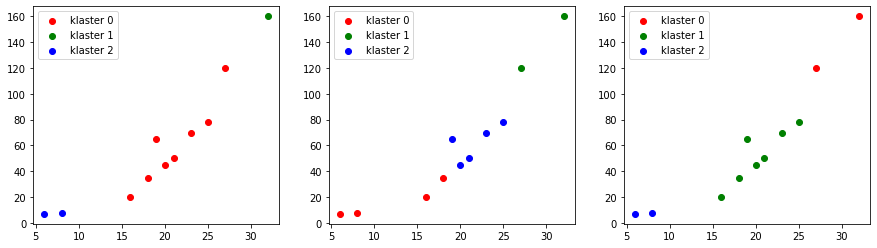

In [10]:
# mozemo i drugaciji pristup da radimo. Mi ovde u psima ocekujemo da imamo neka 3 klastera, male, velike i
# srednje pse, pa mozemo da napravimo AgglomerativeClustering sa n_clusters=3, ali ne znamo koji nam 
# linkage parametar najvise odgovara, pa mozemo da probamo razlitcite, slicno kao GridSearchCV

# crtacemo u svakoj iteraciji novis scatter plot, mozemo sa figure
colors = ['red', 'green', 'blue']
# NOTE: ovaj figsize nije brotj subplotova, nego neka velicina u incima na ekranu(?)
fig = plt.figure(figsize=(15, 4))

for i, link in enumerate(['single', 'complete', 'average']):
    model = AgglomerativeClustering(n_clusters=3, linkage=link)
    model.fit(X)
    
    # posto radimo sa 3 klastera, ovde znamo da ce labeli biti 3 moguca razlicita broja 0, 1, 2 
    # mozmeo da ih dodamo u dataframe
    df['label'] = model.labels_
    
    # 1 red 3 kolone
    fig.add_subplot(1, 3, i + 1)
       
    for cluster_label in range(0, 3):
       cluster = df[df['label'] == cluster_label]
       plt.scatter(cluster['height'], cluster['weight'], 
                   marker='o', color=colors[cluster_label], label=f'klaster {cluster_label}')
    
    plt.legend(loc='best')
plt.show()

# primetimo da razlicitim linkovima dobijamo potencijalno razlicite klastere istih podataka

In [11]:
# sada hocemo da crtamo dendrogram. Za to mozemo da iskoristimo scipy biblioteku
# u njoj imamo implementirano i hijerarhijsko klasterovanje, pa bismo mogli i odatle da pravimo nas model
# to crtanje dendrograma je predvidjeno da radi sa rezultatom koji da samo klasterovanje iz scipy, tako da 
# ne mozemo tek tako da prosledimo ovo sto dobijemo iz sklearn
from scipy.cluster.hierarchy import dendrogram, linkage

In [12]:
# ponovo cemo da narpavimo sve samo pomocu scipy
df = pd.read_csv('../dogs.csv')

# ovo smo dodali kasnije, bice nam zgodno da se na dendrogramu instance vide po imenu rase psa
# a ne po brojevima, ovako to postaje index u dataframeu umesto onog standardnog 0,1,2...
df.set_index('breed', inplace=True)

X = pd.DataFrame(MinMaxScaler().fit_transform(X), columns=feature_names)
print(X)

      height    weight
0   0.538462  0.248366
1   0.384615  0.084967
2   0.461538  0.183007
3   0.807692  0.738562
4   0.076923  0.006536
5   0.730769  0.464052
6   0.653846  0.411765
7   1.000000  1.000000
8   0.576923  0.281046
9   0.500000  0.379085
10  0.000000  0.000000


In [13]:
# linkage metod za nas radi hijerarhijsko klasterovanje na skupu koji prolseidmo
Z = linkage(X)

# rezultat je neka matrica, primetimo da se dobije slicna stvar kao kada smo iznad radili children_
# tj dobijamo kako se sta spaja, samo imamo neka 2 dodatna parametra u svakoj listi
# prvi dodatni parametar je rastojanje izmedju ta dva klastera koji se spajaju
# drugi dodatni parametar je broj koliko instanci sada postoji u novom klasteru
print(Z)
print(Z.shape)

[[ 0.          8.          0.05047034  2.        ]
 [ 4.         10.          0.07720025  2.        ]
 [ 5.          6.          0.09301156  2.        ]
 [ 2.         11.          0.10094068  3.        ]
 [ 9.         14.          0.1246148   4.        ]
 [ 1.         15.          0.1246148   5.        ]
 [13.         16.          0.15167269  7.        ]
 [ 3.         17.          0.28508383  8.        ]
 [12.         18.          0.31753116 10.        ]
 [ 7.         19.          0.32454896 11.        ]]
(10, 4)


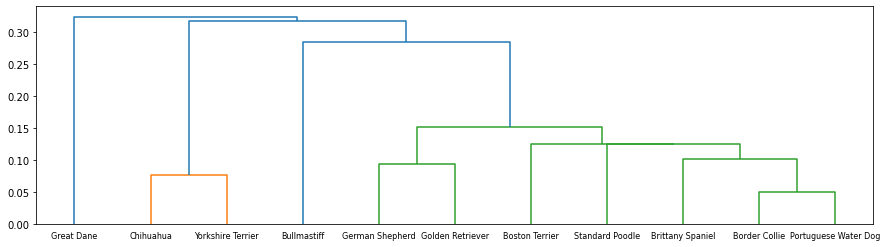

In [21]:
# i crtamo, koristimo ovaj labels da nebi pisali brojevi instanci
# ovo sa figure smo radili da bi slika bila veca i lepsa i da se tekst ne preklapa.
# mogli smo i samo da pozovemo dendrogram(Z) i tu da stanemo
fig = plt.figure(figsize=(15, 4))
dendrogram(Z, labels=df.index, leaf_font_size=8)
plt.show()

In [22]:
# opciono sta jos mozemo da radimo. Kada smo dobili onu matricu Z, mozemo svakoj instanci polaznog skupa da
# dodelimo oznaku nekog klastera, to mozemo da radimo sa fcluster
from scipy.cluster.hierarchy import fcluster

In [28]:
# dodela oznake (broj izmedju 1 i k) klastera svakoj isntanci
# ne spajamo dva kalstra izmedju kojih je rastojanje vece od 0.2
# to 0.2 smo odabrali otprilike tako sto smo na dendrogramu iznad videli da tu moze da se povuce linija
# koja bi lepo razdvojila klastere (?)
threshold = 0.2
df['label'] = fcluster(Z, t=threshold, criterion='distance')

In [29]:
print(df['label'].unique())

[2 3 1 4]


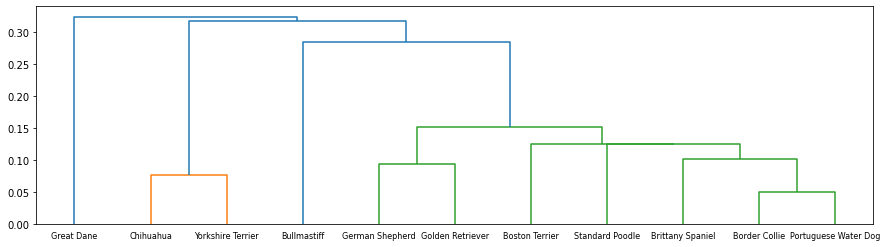

In [32]:
# ova slika je identicna kao ona prosla (?)
fig = plt.figure(figsize=(15, 4))
dendrogram(Z, labels=df.index, leaf_font_size=8, color_threshold=threshold)
plt.show()

In [ ]:
# vidi u zvanicnim materijalima dodatno objasnjenje kako da bez scipy crtamo dendrogram na osnovu children_